In [3]:
from __future__ import division # this is important

import numpy as np
import matplotlib.pylab as plt

# Week 6 -- Stochastic Differential Equations

#### Lecture 6.3 and 6.4 -- stochasticEulerIntegration.m

We look at the integration of stochastic differential equations using Euler's method. The idea is that we simulate many trajectories, and numerically integrate each trajetory using Euler's method. 

In [7]:
def stochasticEulerIntegration(t0,f0,a,b,T,N,M):
    """
    Integration of SDE in the Euler scheme
    INPUT:
        t0 : Initial time
        f0 : Initial value of the function f(t_0) = f0; 
        a  : Handle of the function a(t,f) in the drift term
        b  : Handle of the function b(t,f) in the diffusion term 
        T  : Length of integration interval [t0, t0+T]
        N  : Number of time steps
        M  : Number of trajectories in simulation 
  
    OUTPUT:
        t  : Times at which the trajectory is monitored
               t(n) = t0 + n Delta T
        f  : values of the trajectory that starts from 
               f(1) = f0 at t0
    """
    # Size of integration step
    deltaT = T/N

    # Initialize monitoring times
    t = np.linspace(t0, t0 + T, N + 1)
 
    # Initialize f   [M rows, (N+1) columns]
    # Each row of f is a trajectory
    # Each column corresponds to a monitoring time       
    f = np.zeros((M,N+1))


    # Simulate trajectories
    # generate X ~ N(0,1) 
    # initial condition
    X  = np.random.randn(M,N)
    f[:, 0] = f0

    for n in range(int(N)):
        f[:,n+1] = f[:, n] + a(t[n], f[:, n]) * deltaT + b(t[n], f[:, n]) * np.sqrt(deltaT) * X[:,n]

    return t, f

#### demo_stochasticVolatility: Simulation of SDE for a stochastic volatility model

As an example we integrate the reversion-to-the-mean model and compare this to its mean value. (Compare this average to Week's 5 deterministic mean reversion model).

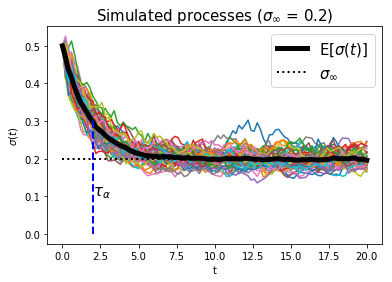

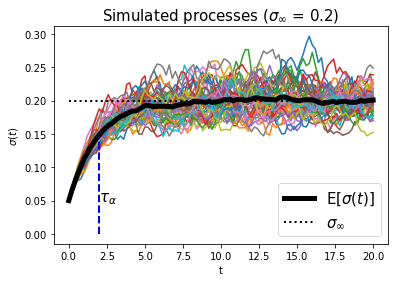

In [10]:

def exampleStochasticEulerIntegration(sigma_0):
    sigma_infty, alpha, xi = .2, .5, .1
    def a(t, sigma):
        return - alpha * (sigma - sigma_infty)
    def b(t, sigma):
        return xi * sigma
    
    t0, T = 0, 20
    N, M = 100, 50
    t, sigma_t = stochasticEulerIntegration(t0,sigma_0,a,b,T,N,M)
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.plot(t, sigma_t.T)
    ax.set_xlabel('t')
    ax.set_ylabel('$\sigma(t)$')
    ax.plot(t, np.mean(sigma_t, axis=0), 'k', linewidth=5, label='E[$\sigma(t)$]')
    ax.plot([t[0], t[-1]], [sigma_infty, sigma_infty], 'k:', linewidth=2, label = '$\sigma_{\infty}$')
    sigma_e = sigma_infty + (sigma_0 - sigma_infty) / np.exp(1)
    ax.plot([1/alpha, 1/alpha], [0, sigma_e], 'b--', linewidth=2)
    ax.legend(fontsize=15, loc='best')
    ax.text(1/alpha, sigma_e /3., r'$\tau_\alpha$', fontsize=15)
    ax.set_title('Simulated processes ($\sigma_\infty$ = {})'.format(sigma_infty), fontsize=15)
    plt.show()
    return ax
    
exampleStochasticEulerIntegration(sigma_0 = .5);
exampleStochasticEulerIntegration(sigma_0 = .05);
plt.show()

#### Lecture 6.8 -- demo_stochasticEulerIntegration_geometricBrownianMotion

Recall the SDE for geometric Brownian Motion:

$ dS(t) = \mu S(t) dt + \sigma S(t) dW(t)$

Here the term proportional to $dt$ is the drift term and $dW$ is the diffusive term which is the source of randomness.

This SDE is exactly solvable, which we can use to compare the stochastic Euler integration scheme to the exact solution. This is done below.

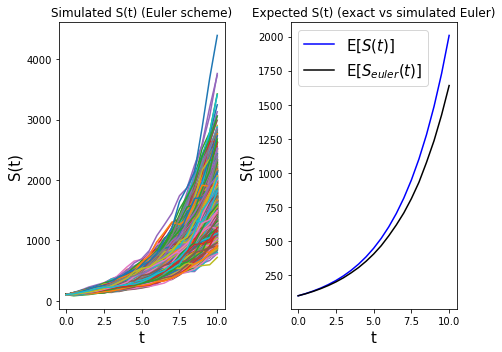

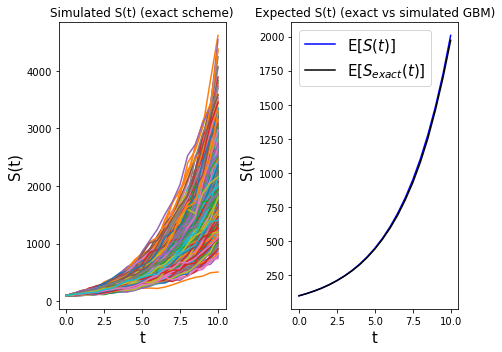

In [12]:
def stochasticEulerIntegration_geometricBrownianMotion():
    """
    Use stochastic Euler method to integrate SDE for geometric Brownian Motion.
    """
    ## Initial parameters:
    S0    = 100   # initial asset price
    t0    = 0.0   # initial date
    mu    = 0.3   # expected return
    sigma = .1    # volatility
    T     = 10.   # length of time interval in years
    N     = 20    # number of integration steps
    M     = 1000  # number of trajectories
    
    deltaT = T/N
    t = np.linspace(t0, t0 + T, N+1)
    
    # For comparision
    # Evolution of the expected value of S: E[S(t)]:
    averageS_exact = S0 * np.exp(mu * t)
    
    # Stochastic evolution
    S_euler = np.zeros((M, N+1))
    S_euler[:,0] = S0
    X = np.random.randn(M, N)
    for n in range(N):
        S_euler[:, n+1] = S_euler[:, n] * (1 + mu * deltaT + sigma * np.sqrt(deltaT) * X[:, n])
        
    ### Graph the results
    fig = plt.figure(figsize=(7,5))
    ax1 = fig.add_subplot(121)
    ax1.plot(t, S_euler.T)
    ax1.set_xlabel('t', fontsize=15)
    ax1.set_ylabel('S(t)', fontsize=15)
    ax1.set_title('Simulated S(t) (Euler scheme)')
    ax2 = fig.add_subplot(122)
    ax2.plot(t, averageS_exact, 'b', linewidth = 1.5, label='E[$S(t)$]')
    ax2.plot(t, np.mean(S_euler, axis=0), 'k', linewidth = 1.5, label='E[$S_{euler}(t)$]')
    ax2.set_xlabel('t', fontsize=15)
    ax2.set_ylabel('S(t)', fontsize=15)    
    ax2.legend(loc='best', fontsize=15)
    ax2.set_title('Expected S(t) (exact vs simulated Euler)')
    plt.tight_layout()
    
    
    ## We can also simulate trajectories using an exact method -- This is simply because this particluar SDE
    ## can be solved exactly.
    S = np.zeros((M, N+1))
    X = np.random.randn(M, N)
    S[:, 0] = S0
    for n in range(N):
        S[:, n+1] = S[:, n] * np.exp((mu - .5 * sigma**2) * deltaT + sigma * np.sqrt(deltaT) * X[:, n])
    fig = plt.figure(figsize=(7,5))
    ax1 = fig.add_subplot(121)
    ax1.plot(t, S.T)
    ax1.set_xlabel('t', fontsize=15)
    ax1.set_ylabel('S(t)', fontsize=15)
    ax1.set_title('Simulated S(t) (exact scheme)')
    ax2 = fig.add_subplot(122)
    ax2.plot(t, averageS_exact, 'b', linewidth = 1.5, label='E[$S(t)$]')
    ax2.plot(t, np.mean(S, axis=0), 'k', linewidth = 1.5, label='E[$S_{exact}(t)$]')
    ax2.set_xlabel('t', fontsize=15)
    ax2.set_ylabel('S(t)', fontsize=15)    
    ax2.legend(loc='best', fontsize=15)
    ax2.set_title('Expected S(t) (exact vs simulated GBM)')
    plt.tight_layout()
    

    
stochasticEulerIntegration_geometricBrownianMotion()
plt.show()

These two graphs show the error which propagetes in the Euler scheme to large times.

#### Lecture 6.8 -- simulateGeometricBrownianMotion.m

Here we define a function to simulate geometric Brownian Motion using an exact scheme. This was already used above and compared with the Euler scheme.

In [21]:
def simulateGeometricBrownianMotion(M, N, t0, S0, T, mu, sigma):
    """
    Simulate geometric Brownian motion in [t0,t0+T]

    INPUT:
        M  : Number of trajectories
        N  : Number of time steps
        t0 : initial time
        S0 : initial value S(t0) = S0
        T  : Length of the simulation interval [t0,t0+T]
         mu,sigma : parameters of the process
    OUTPUT:
        t  : Times at which the trajectory is monitored
        S  : Simulation of M trajectories of geometric Brownian motion

    EXAMPLE:   

       t0    = 1;    % initial time
       S0    = 100;  % initial value of the underlying
       T     = 2;    % interval [t0,t0+T]  
       N     = 100;  % number of time steps   
       M     = 50;   % number of trajectories 
       mu    = 0.4;  % expecter return   
       sigma = 0.3;  % volatility
       [t,S] = simulateGeometricBrownianMotion(M,N,t0,S0,T,mu,sigma);
       figure(1);  clf
       plot(t,S')
       xlabel('t'); ylabel('S(t)');

    """
    ## Size of the integration step
    deltaT = T/N

    ## Monitoring times
    t = np.linspace(t0, t0 + T, N + 1)

    ## Simulate M trajectories 
    X = np.random.randn(M, N)  # Gaussian white noise
    e = np.exp((mu - 0.5 * sigma**2) * deltaT + sigma * np.sqrt(deltaT) * X)
    S = np.cumprod(np.c_[S0 * np.ones((M,1)), e], 1)
    return t, S

A working example is then:

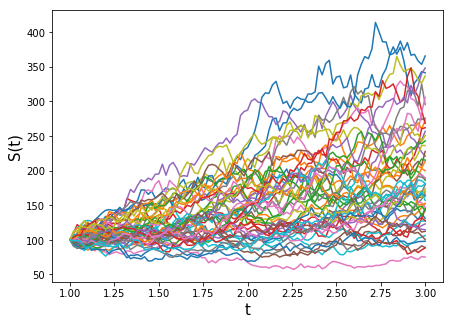

In [24]:
def simulateGeometricBrownianMotionExample():
    t0    = 1    # initial time
    S0    = 100  # initial value of the underlying
    T     = 2    # interval [t0,t0+T]  
    N     = 100  # number of time steps   
    M     = 50   # number of trajectories 
    mu    = 0.4  # expecter return   
    sigma = 0.3  # volatility
    t, S = simulateGeometricBrownianMotion(M,N,t0,S0,T,mu,sigma)
    fig = plt.figure(figsize=(7,5))
    plt.plot(t, S.T)
    plt.xlabel('t',fontsize=15)
    plt.ylabel('S(t)',fontsize=15)
    
simulateGeometricBrownianMotionExample()
plt.show()

#### demo_geometricBrownianMotion.m

Simulated trajectories of geometric Brownian motion, and a graphical comparsion of the distribution of the endpoints vs the exact distribution. This demo does not appear in the lectures.

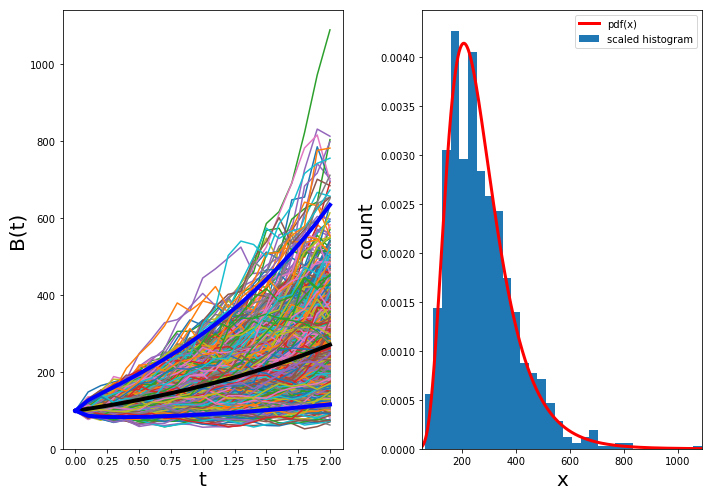

In [29]:
from scipy.stats import lognorm
from custom_functions_iversity import graphicalComparisonPdf 

# As before, we define our own lognormal PDF function which works like MATLAB's implementation.
def lognpdf(x, mean, sig):
    return lognorm.pdf(x, scale = np.exp(mean), s = sig)


def demo_geometricBrownianMotion(M,N):
    """
    simulation and properties of arithmetic Brownian Motion
    INPUT: 
         M : Number of simulations
         N : Number of steps in simulations
    """

    ## Simulate in [t0,t0+T]
    t0 = 0
    T  = 2

    ## Parameters GBM
    S0    = 100.0
    mu    = 0.50
    sigma = 0.30

    ## Simulation
    t, S = simulateGeometricBrownianMotion(M,N,t0,S0,T,mu,sigma)

    if (M < 30):  # just plot all processes
        fig = plt.figure(figsize=(15,7))
        ax1 = fig.add_subplot(111)    
        ax1.plot(t, S.T)
        

    else:   # 
        ST = S[:,-1]  # final values
        def modelPDF(x):
            return lognpdf(x, np.log(S0) + (mu-.5*sigma**2)*T, sigma*np.sqrt(T))
        
        fig = plt.figure(figsize=(10,7))
        
        ax2 = fig.add_subplot(122)    
        graphicalComparisonPdf(ST, modelPDF, 1, np.min(S), np.max(S), axes_object=ax2)
        ax2.set_ylabel('count', fontsize=20)
        ax2.set_xlabel('x', fontsize=20)
        
        ## statistical parameters
        expected_logS = np.log(S0) + mu * t
        expected_S = S0 * np.exp(mu * t)
        std_logS = sigma * np.sqrt(t)
        
        
        ax1 = fig.add_subplot(121)
        ax1.plot(t, S.T)
        ax1.plot(t, expected_S, 'black', linewidth=4)    
        alpha = 2
        # this regions represents the interval [mu - 2 * sigma, mu + 2 * sigma], with sigma time dependent.
        ax1.plot(np.transpose([t,t]), np.transpose([np.exp(expected_logS + alpha* std_logS), 
                                              np.exp(expected_logS - alpha * std_logS)]), 'b', linewidth=4)  
    ax1.set_xlabel('t',fontsize=20)
    ax1.set_ylabel('B(t)',fontsize=20)
    plt.tight_layout()
    
demo_geometricBrownianMotion(1000,20)
plt.show()

The plot on the right hand side shows the distribution of the endpoints of the simulated trajectories, and is compared to a lognormal distribution (which is the exact version).

#### Lecture 6.9 and 6.10 -- Jump diffusion

To simulate shoc events we add a jump diffussion term to the SDE of the stock price:

$ dS(t) = \mu S(t) dt + \sigma S(t) dW(t) + \gamma d J(t)$

where $J(t) = \sum_{i=1}^{N(t)} Z_i$ with $Z_i \sim U[a,b]$ iid random variables or Poisson distribution. This can be e.g. a uniform distribution. This term introduces random discontinuities in the trajectories (jumps). The size of J(t) is simply the sum of all jumps that occured before time t.



In [30]:
def jumpDiffusionIntegration(t0,f0,a,b,c,lda,randJumpSize,T,N,M):
    """
    Integration of SDE for diffusion with jumps
   INPUT:
          t0     : Initial time
          f0     : Initial value of the function f(t0) = f0;
          a      : Handle of the function a(t,f) in the drift term
          b      : Handle of the function b(t,f) in the diffusion term
          c      : Handle of the function c(t,f) in the jump term
    lda          : Parameter of the Poisson counting process
    randJumpSize : Handle of the function that generates jump sizes
          T      : Lenght of integration interval [t0, t0+T]
          N      : Number of time steps
          M      : Number of trajectories in simulation

    OUTPUT:
          t      : Times at which the trajectory is monitored
                   t(n) = t0 + n Delta T
          f      : values of the trajectory that starts from
                   f(1) = f0 at t0
    t_jump       : Times for jumps (cell array)
    f_jump_minus : Values of the trajectory right before jump
    f_jump       : Values of the trajectory right after jump
    """
    # size of integration step
    deltaT = T/N
    # initialize f, t and generate an array of normal random numbers
    f = np.zeros((M, N+1))
    t = np.linspace(t0, t0 + T, N+1)
    X = np.random.randn(M, N)
    
    # initialize lists of M empty lists to hold jump sequences
    
    t_jump = [[] for x in xrange(M)]         # Holds time at which jumps occur
    f_jump_min = [[] for x in xrange(M)]     # Holds value of integrated f up to jump time from last value
    f_jump = [[] for x in xrange(M)]         # Holds value of f after jump
    
    # initialize initial value
    f[:, 0] = f0
    
    
    for m in range(M):
        
        # Simulate mth trajectory
        nJump = 0
        deltaT_jump = -np.log(np.random.rand()) / lda # delay between consecutive jumps
        t_jump[m].append(t0 + deltaT_jump)  # time of the first jump for mth trajectory
        
        for n in range(N):
            
            
            tInit = t[n]
            fInit = f[m, n]
            
            while (t[n+1] >= t_jump[m][nJump]):
                # If there is a jump between t[n] and t[n+1] then we have to integrate
                # from t[n] to this jump time (stored in t_jump)
                
                
                # Integrate f over SDE from last time (tInit) up to next jump time 
                # jump_time is last element stored in t_jump[m]
                dT = t_jump[m][nJump] - tInit
                f_jump_min[m].append(fInit + a(tInit, fInit) * dT + 
                                     b(tInit, fInit) * np.sqrt(dT)*np.random.randn())
                
                # Handle the jump event
                jumpSize = randJumpSize()
                
                f_jump[m].append(f_jump_min[m][nJump] + 
                                 jumpSize * c(t_jump[m][nJump], f_jump_min[m][nJump]))
                # Create a new jump event. If this new jump event happens before t[n+1], then 
                # the while loop is run again. If not, we move to the next time t[n+1].
                
                
                deltaT_jump = -np.log(np.random.rand()) / lda
                t_jump[m].append(t_jump[m][nJump] + deltaT_jump)
                tInit = t_jump[m][nJump]
                fInit = f_jump[m][nJump]
                nJump += 1
            # At this stage the next jump event happens after t[n+1], so we integrate f from tInit up to t[n+1]$
            dT = t[n+1] - tInit
            f[m, n+1] = fInit + a(tInit, fInit)* dT + b(tInit, fInit) * np.sqrt(dT)* X[m, n]
        t_jump[m] = t_jump[m][:-1]
        
    return t, f, t_jump, f_jump_min, f_jump

As an example we consider the Mertion Jump Diffussion model in which the jumpsize is generated by a lognormal distribution.

In [31]:
def exampleMertonJumpDiffusionModel():
    # Properties of the stock price
    S0 = 100.; mu = 0.15; sigma = 0.2;
    
    lda = 5 # average of lda jumps per year
    
    # functions that enter the SDE
    def a(t, S):
        "Drift term"
        return mu * S
    def b(t, S):
        "Diffusion term"
        return sigma * S
    def c(t, S):
        "jump term"
        return S
    
    def randJumpsize():
        "Random number generator for jump size"
        return np.random.lognormal(0, 0.2) - 1
    
    # initial time
    t0 = 1
    # length
    T = 2
    # number of steps
    N = 50
    # number of trajectories
    M = 100
    
    t, S, t_jump, S_jump_min, S_jump = jumpDiffusionIntegration(t0,S0,a,b,c,lda,randJumpsize,T,N,M)
    
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(211)
    ax.plot(t, S.T)
    ax.set_xlabel('t', fontsize=15); ax.set_ylabel('S(t)', fontsize=15)
    
    ax = fig.add_subplot(212)
    ax.plot(t_jump[0], S_jump_min[0], 'ro', label='price before jump')
    ax.plot(t_jump[0], S_jump[0], 'rx', label='price after jump')
    ax.plot(t, S[0], label='S(t)')
    ax.set_title('jump occurences of first trajectory')
    ax.set_xlabel('t', fontsize=15); ax.set_ylabel('S(t)', fontsize=15)
    plt.tight_layout()
    plt.show()
    

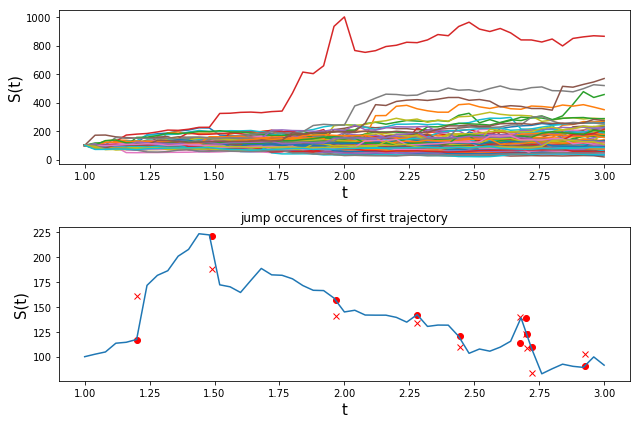

In [32]:
exampleMertonJumpDiffusionModel()

The red dots denotes the stock price before the jump, and the red cross the price after the jump.

Note that the jumps are integrated over, and the graph is plotted using equally spaced intervals. The jumps therefore do not always form a sharp jump in the graph of a stock, especially if multiple jumps occur in the same interval.

The final file mertonJumpDiffusionIntegration.m performs the same method, but replaces the Euler integration scheme by the exact solution of the Black-Scholes SDE.

In [33]:
def mertonJumpDiffusionIntegration(t0,S0,mu,sigma,lda,randJumpY,T,N,M):
    """
    Integration of SDE for diffusion with jumps
    INPUT:
          t0     : Initial time
          S0     : Initial value of the function S(t0) = S0;
          mu     : parameter in the drift term
          sigma  : parameter in the diffusion term
    lda          : Parameter of the Poisson counting process
    randJumpY    : random number generator. Jumps are of size Z = randJumpY()-1
          T      : Lenght of integration interval [t0, t0+T]
          N      : Number of time steps
          M      : Number of trajectories in simulation

    OUTPUT:
          t      : Times at which the trajectory is monitored
                   t(n) = t0 + n Delta T
          S      : values of the trajectory that starts from
                   S(1) = S0 at t0
    t_jump       : Times for jumps (cell array)
    S_jump_minus : Values of the trajectory right before jump
    S_jump       : Values of the trajectory right after jump
    """
    # size of integration step
    deltaT = T/N
    # initialize S, t and generate an array of normal random numbers
    S = np.zeros((M, N+1))
    t = np.linspace(t0, t0 + T, N+1)
    X = np.random.randn(M, N)
    
    # initialize lists of M empty lists to hold jump sequences
    
    t_jump = [[] for x in range(M)]         # Holds time at which jumps occur
    S_jump_min = [[] for x in range(M)]     # Holds value of integrated S up to jump time from last value
    S_jump = [[] for x in range(M)]         # Holds value of S after jump
    
    # initialize initial value
    S[:, 0] = S0
    
    
    for m in range(M):
        
        # Simulate mth trajectory
        nJump = 0
        deltaT_jump = -np.log(np.random.rand()) / lda # delay between consecutive jumps
        t_jump[m].append(t0 + deltaT_jump)  # time of the first jump for mth trajectory
        
        for n in range(N):
            
            
            tInit = t[n]
            SInit = S[m, n]
            
            while (t[n+1] >= t_jump[m][nJump]):
                # If there is a jump between t[n] and t[n+1] then we have to integrate
                # from t[n] to this jump time (stored in t_jump)
                
                
                # Integrate S over SDE from last time (tInit) up to next jump time 
                # jump_time is last element stored in t_jump[m]
                dT = t_jump[m][nJump] - tInit
                S_jump_min[m].append(SInit * np.exp((mu-0.5*sigma**2)*dT + 
                                                    sigma*np.sqrt(dT)*np.random.randn())) 
                
                # Handle the jump event
                jumpY = randJumpY()
                
                S_jump[m].append(S_jump_min[m][nJump] * jumpY)
                # Create a new jump event. If this new jump event happens before t[n+1], then 
                # the while loop is run again. If not, we move to the next time t[n+1].
                
                
                deltaT_jump = -np.log(np.random.rand()) / lda
                t_jump[m].append(t_jump[m][nJump] + deltaT_jump)
                tInit = t_jump[m][nJump]
                SInit = S_jump[m][nJump]
                nJump += 1
                
            # At this stage the next jump event happens after t[n+1], so we integrate S from tInit up to t[n+1]$
            dT = t[n+1] - tInit
            S[m, n+1] = SInit * np.exp((mu-0.5*sigma**2)*dT + sigma*np.sqrt(dT)*X[m, n])
            
        t_jump[m] = t_jump[m][:-1]
        
    return t, S, t_jump, S_jump_min, S_jump


In [34]:
def exampleMertonJumpDiffusionModel2():
    # Properties of the stock price
    S0 = 100.; mu = 0.15; sigma = 0.2;
    
    lda = 5 # average of lda jumps per year
    
    def randJumpY():
        "Random number generator for jump"
        return np.random.lognormal(0, 0.2)
    
    # initial time
    t0 = 1
    # length
    T = 2
    # number of steps
    N = 50
    # number of trajectories
    M = 100
    
    t, S, t_jump, S_jump_min, S_jump = mertonJumpDiffusionIntegration(t0,S0,mu,sigma,lda,randJumpY,T,N,M)
    
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(211)
    ax.plot(t, S.T)
    ax.set_xlabel('t', fontsize=15); ax.set_ylabel('S(t)', fontsize=15)
    
    ax = fig.add_subplot(212)
    ax.plot(t_jump[0], S_jump_min[0], 'ro', label='price before jump')
    ax.plot(t_jump[0], S_jump[0], 'rx', label='price after jump')
    ax.plot(t, S[0], label='S(t)')
    ax.set_title('jump occurences of first trajectory')
    ax.set_xlabel('t', fontsize=15); ax.set_ylabel('S(t)', fontsize=15)
    plt.tight_layout()
    plt.show()
    

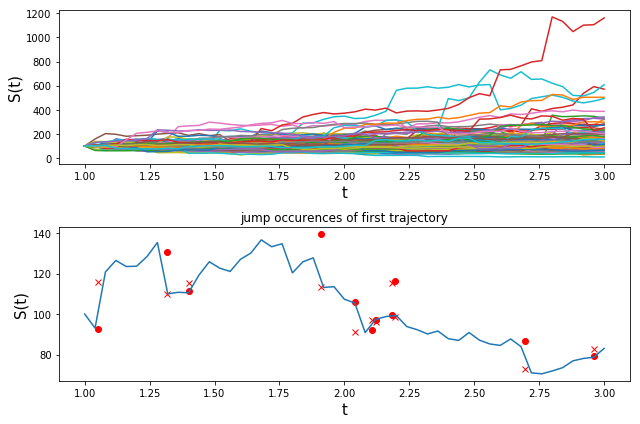

In [35]:
exampleMertonJumpDiffusionModel2()